<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Preparation</a></span><ul class="toc-item"><li><span><a href="#Import-Dataset" data-toc-modified-id="Import-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import Dataset</a></span></li><li><span><a href="#Scale-Time-and-Amount" data-toc-modified-id="Scale-Time-and-Amount-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Scale Time and Amount</a></span></li><li><span><a href="#Split-data-to-get-test-set" data-toc-modified-id="Split-data-to-get-test-set-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Split data to get test set</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>K-Fold Cross Validation</a></span></li><li><span><a href="#Evaluate-Model-on-test-set" data-toc-modified-id="Evaluate-Model-on-test-set-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Evaluate Model on test set</a></span></li></ul></li><li><span><a href="#Autoencoder-+-Logistic-Regression" data-toc-modified-id="Autoencoder-+-Logistic-Regression-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Autoencoder + Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#Autoencoder" data-toc-modified-id="Autoencoder-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Autoencoder</a></span><ul class="toc-item"><li><span><a href="#Randomly-select-a-subset-of-normal-transcations-for-the-Autoencoder-training" data-toc-modified-id="Randomly-select-a-subset-of-normal-transcations-for-the-Autoencoder-training-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Randomly select a subset of normal transcations for the Autoencoder training</a></span></li><li><span><a href="#Train-Autoencoder" data-toc-modified-id="Train-Autoencoder-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Train Autoencoder</a></span></li><li><span><a href="#Get-latent-representation" data-toc-modified-id="Get-latent-representation-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Get latent representation</a></span></li></ul></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>K-Fold Cross Validation</a></span></li><li><span><a href="#Evaluate-on-test-set" data-toc-modified-id="Evaluate-on-test-set-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Evaluate on test set</a></span></li></ul></li></ul></li><li><span><a href="#Oversampling-+-Logistic-Regression" data-toc-modified-id="Oversampling-+-Logistic-Regression-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Oversampling + Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>K-Fold Cross Validation</a></span></li><li><span><a href="#Evaluation-on-test-set" data-toc-modified-id="Evaluation-on-test-set-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Evaluation on test set</a></span></li></ul></li><li><span><a href="#Undersampling-+-Logistic-Regression" data-toc-modified-id="Undersampling-+-Logistic-Regression-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Undersampling + Logistic Regression</a></span><ul class="toc-item"><li><span><a href="#K-Fold-Cross-Validation" data-toc-modified-id="K-Fold-Cross-Validation-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>K-Fold Cross Validation</a></span></li><li><span><a href="#Evaluate-on-test-set" data-toc-modified-id="Evaluate-on-test-set-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Evaluate on test set</a></span></li></ul></li><li><span><a href="#Summary" data-toc-modified-id="Summary-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Summary</a></span><ul class="toc-item"><li><span><a href="#Model-1" data-toc-modified-id="Model-1-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Model 1</a></span></li><li><span><a href="#Model-2" data-toc-modified-id="Model-2-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Model 2</a></span></li><li><span><a href="#Model-3" data-toc-modified-id="Model-3-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Model 3</a></span></li><li><span><a href="#Model-4" data-toc-modified-id="Model-4-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Model 4</a></span></li></ul></li></ul></div>

In [2]:
import pandas as pd
import numpy as np

from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

C:\Users\jaengel\AppData\Local\Continuum\miniconda3\envs\creditcardfraud\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\jaengel\AppData\Local\Continuum\miniconda3\envs\creditcardfraud\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\jaengel\AppData\Local\Continuum\miniconda3\envs\creditcardfraud\lib\site-

In [3]:
seed = 42

In [4]:
def evaluate_model(clf, X_test, y_test, name='Not specified'):
    
    print(f"Class distribution in test data:\nNormal: {len(y_test[y_test==0])}\nFraud: {len(y_test[y_test==1])}")
    
    fig, axes = plt.subplots(1,2, figsize=(20,6))
    
    # Confusion Matrix
    plot_confusion_matrix(clf, X_test, y_test, normalize=None,
                          display_labels=['Normal', 'Fraud'], cmap='Greens', ax=axes[0])
    axes[0].set_title('Confusion Matrix\n')
    
    plot_confusion_matrix(clf, X_test, y_test, normalize='true',
                          display_labels=['Normal', 'Fraud'], cmap='Greens', ax=axes[1])
    axes[1].set_title('Confusion Matrix\nnormalized')
    
    # Precision Recall Curve
    plot_precision_recall_curve(clf, X_test, y_test, name=name)
    plt.title('Precision Recall Curve')

## Data Preparation

### Import Dataset

In [5]:
df = pd.read_csv("../data/creditcard.csv")
print(f"Rows: {df.shape[0]}")
print(f"Cols: {df.shape[1]}")

Rows: 284807
Cols: 31


### Scale Time and Amount

In [6]:
# df.Time = StandardScaler().fit_transform(df.Time.values.reshape(-1, 1))
# df.Amount = StandardScaler().fit_transform(df.Amount.values.reshape(-1, 1))

Autoencoder works better when all features are scaled, For the other models it is not relevant.

In [7]:
for col in df.drop('Class', axis=1).columns:
    print(f"Scaling {col}")
    df[col] = StandardScaler().fit_transform(df[col].values.reshape(-1, 1))

Scaling Time
Scaling V1
Scaling V2
Scaling V3
Scaling V4
Scaling V5
Scaling V6
Scaling V7
Scaling V8
Scaling V9
Scaling V10
Scaling V11
Scaling V12
Scaling V13
Scaling V14
Scaling V15
Scaling V16
Scaling V17
Scaling V18
Scaling V19
Scaling V20
Scaling V21
Scaling V22
Scaling V23
Scaling V24
Scaling V25
Scaling V26
Scaling V27
Scaling V28
Scaling Amount


### Split data to get test set

In [8]:
X_orig = df.drop('Class', axis=1)
y_orig = df.Class

With stratification we make sure to keep the ration of normal and fraudulent transactions

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, test_size=0.3,
                                                    random_state=seed, stratify=y_orig)

In [10]:
print(f"Train samples: {y_train.shape[0]}")
print(f"Test samples: {y_test.shape[0]}")
print(f"Ratio: {y_test.shape[0]/y_orig.shape[0]}")

Train samples: 199364
Test samples: 85443
Ratio: 0.3000031600346902


## Logistic Regression

### K-Fold Cross Validation

In [11]:
K = 5
scoring = 'recall'
parameters = {
    'C':[0.01, 0.1, 1, 10, 100],
    'max_iter':[500]
}

In [12]:
GSCV_1 = GridSearchCV(LogisticRegression(random_state=seed),
                      cv=K, param_grid=parameters, scoring=scoring, n_jobs=-1, verbose=2)

In [13]:
GSCV_1.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   15.6s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   17.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=2)

In [14]:
clf_1 = GSCV_1.best_estimator_

In [15]:
GSCV_1.best_score_

0.6480392156862745

### Evaluate Model on test set

Class distribution in test data:
Normal: 85295
Fraud: 148


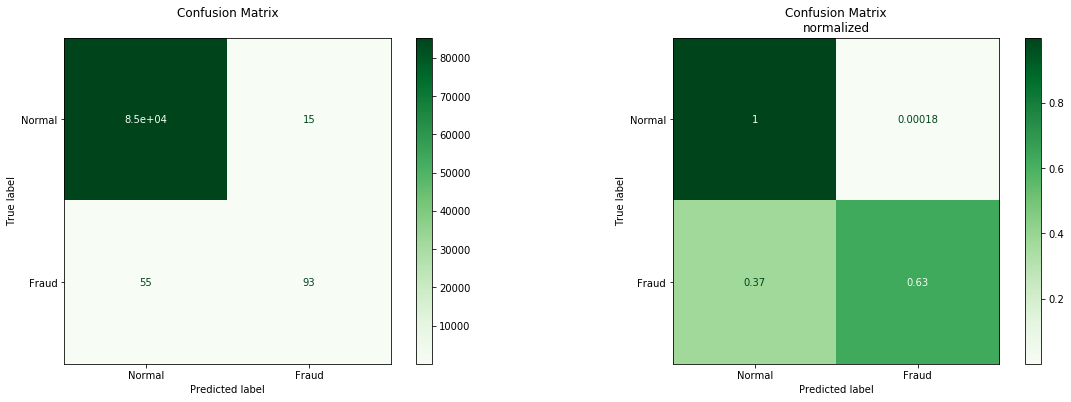

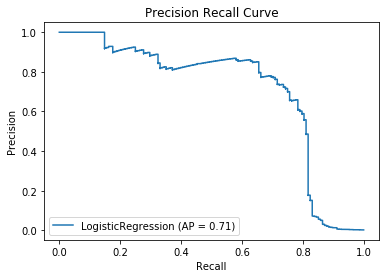

In [16]:
evaluate_model(clf_1, X_test, y_test, 'LogisticRegression')

## Autoencoder + Logistic Regression

### Autoencoder

#### Randomly select a subset of normal transcations for the Autoencoder training

In [17]:
X_train_norm = X_train[y_train == 0]
X_train_norm.shape

(199020, 30)

In [18]:
X_train_AE = X_train_norm.sample(frac=0.25, random_state=seed)
X_train_AE.shape

(49755, 30)

In [19]:
# Remove AE samples from classifier training data
X_train_clf = X_train.drop(X_train_AE.index)
y_train_clf = y_train.drop(X_train_AE.index)

#### Train Autoencoder

In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import regularizers

print(tf.__version__)

2.0.0


In [132]:
input_dim = X_train_AE.shape[1]

# input layer 
input_layer = Input(shape=(input_dim,)) # num_features

# encoding part
encoded = Dense(100, activation='tanh', activity_regularizer=regularizers.l1(10e-5))(input_layer)

# latent representation
latent =  Dense(50, activation='relu')(encoded)

# decoding part
decoded = Dense(100, activation='tanh')(latent)

# output layer
output_layer = Dense(input_dim, activation='linear')(decoded)

In [133]:
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(#learning_rate=0.002,
                    optimizer="adadelta", loss="mse")

In [134]:
autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 30)]              0         
_________________________________________________________________
dense_35 (Dense)             (None, 100)               3100      
_________________________________________________________________
dense_36 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_37 (Dense)             (None, 100)               5100      
_________________________________________________________________
dense_38 (Dense)             (None, 30)                3030      
Total params: 16,280
Trainable params: 16,280
Non-trainable params: 0
_________________________________________________________________


In [135]:
autoencoder.fit(X_train_AE.values, X_train_AE.values, 
                batch_size=64, epochs=100, 
                shuffle=True, validation_split=0.20);

Train on 39804 samples, validate on 9951 samples
Epoch 1/100
39804/39804 [==============================] - 2s 39us/sample - loss: 1.0865 - val_loss: 1.1312
Epoch 2/100
39804/39804 [==============================] - 1s 26us/sample - loss: 1.0652 - val_loss: 1.1104
Epoch 3/100
39804/39804 [==============================] - 1s 26us/sample - loss: 1.0452 - val_loss: 1.0909
Epoch 4/100
39804/39804 [==============================] - 1s 26us/sample - loss: 1.0263 - val_loss: 1.0725
Epoch 5/100
39804/39804 [==============================] - 1s 26us/sample - loss: 1.0089 - val_loss: 1.0556
Epoch 6/100
39804/39804 [==============================] - 1s 26us/sample - loss: 0.9926 - val_loss: 1.0398
Epoch 7/100
39804/39804 [==============================] - 1s 26us/sample - loss: 0.9774 - val_loss: 1.0248
Epoch 8/100
39804/39804 [==============================] - 1s 26us/sample - loss: 0.9629 - val_loss: 1.0106
Epoch 9/100
39804/39804 [==============================] - 1s 26us/sample - loss: 0.949

#### Get latent representation

In [144]:
latent_rep = Sequential()
latent_rep.add(autoencoder.layers[0])
latent_rep.add(autoencoder.layers[1])
latent_rep.add(autoencoder.layers[2])

def extract_latent(data):
    return latent_rep.predict(data)

In [145]:
X_train_clf_lat = extract_latent(X_train_clf)
X_train_clf_lat.shape

(149609, 50)

### Logistic Regression

#### K-Fold Cross Validation

In [146]:
K = 5
scoring = 'recall'
parameters = {
    'C':[0.01, 0.1, 1, 10, 100],
    'max_iter':[500]
}

In [147]:
GSCV_2 = GridSearchCV(LogisticRegression(random_state=seed),
                      cv=K, param_grid=parameters, scoring=scoring, n_jobs=-1, verbose=2)
GSCV_2.fit(X_train_clf_lat, y_train_clf)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   15.8s remaining:    1.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   16.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', verbose=2)

In [148]:
clf_2 = GSCV_2.best_estimator_
GSCV_2.best_score_

0.7381500426257459

#### Evaluate on test set

In [149]:
X_test_lat = extract_latent(X_test.values)

Class distribution in test data:
Normal: 85295
Fraud: 148


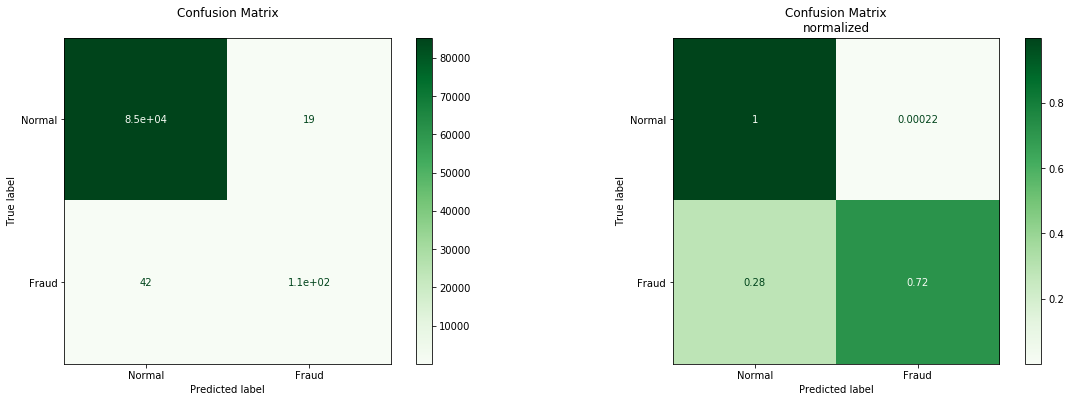

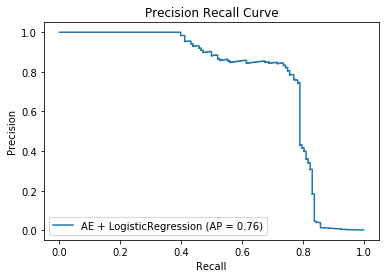

In [150]:
evaluate_model(clf_2, X_test_lat, y_test, 'AE + LogisticRegression')

## Oversampling + Logistic Regression

In [31]:
# Replaced by imblearn.pipeline.Pipeline

# def manual_cv(sampler, log_reg_params):
    
#     SKF = StratifiedKFold(n_splits=5, random_state=seed, shuffle=True)
    
#     avg_accuracy_scores = []
#     avg_recall_scores = []
#     avg_f1_scores = []

#     for C in log_reg_params['C']:

#         accuracy_scores = []
#         recall_scores = []
#         f1_scores = []

#         for train_index, val_index in SKF.split(X_train, y_train):

#             # Sample each train_split separately
#             X_sampled, y_sampled = sampler.fit_resample(X_train.iloc[train_index], y_train.iloc[train_index])

#             # Train Classifier
#             clf = LogisticRegression(random_state=seed, C=C, max_iter=500).fit(X_sampled, y_sampled)

#             # Validate model
#             X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
#             y_pred = clf.predict(X_val)

#             recall_scores.append(recall_score(y_val, y_pred))
#             accuracy_scores.append(accuracy_score(y_val, y_pred))
#             f1_scores.append(f1_score(y_val, y_pred))

#         print(f"Tested model with C = {C}")
#         print(f"Mean accuracy:\t {np.mean(accuracy_scores)}")
#         print(f"Mean recall:\t {np.mean(recall_scores)}")
#         print(f"Mean f1-score:\t {np.mean(f1_scores)}")
#         print()

#         avg_accuracy_scores.append(np.mean(accuracy_scores))
#         avg_recall_scores.append(np.mean(recall_scores))
#         avg_f1_scores.append(np.mean(f1_scores))
        
#     return avg_accuracy_scores, avg_recall_scores, avg_f1_scores

### K-Fold Cross Validation

In [32]:
smote = SMOTE(sampling_strategy='minority', random_state=seed)
log_reg = LogisticRegression(random_state=seed)

In [33]:
model = Pipeline([
        ('sampling', smote),
        ('classification', log_reg)
    ])

In [34]:
scoring = 'f1'
parameters = {
    'classification__C':[0.01, 0.1, 1, 10, 100],
    'classification__max_iter':[500]
}

In [35]:
GSCV_3 = GridSearchCV(model,
                      cv=K, param_grid=parameters, scoring=scoring, n_jobs=-1, verbose=2)
GSCV_3.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   40.5s remaining:    3.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   44.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        SMOTE(k_neighbors=5, kind='deprecated',
                                              m_neighbors='deprecated',
                                              n_jobs=1, out_step='deprecated',
                                              random_state=42, ratio=None,
                                              sampling_strategy='minority',
                                              svm_estimator='deprecated')),
                                       ('classification',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=T...
                                                          

In [36]:
clf_3 = GSCV_3.best_estimator_
GSCV_3.best_score_

0.12679387911722304

### Evaluation on test set

Class distribution in test data:
Normal: 85295
Fraud: 148


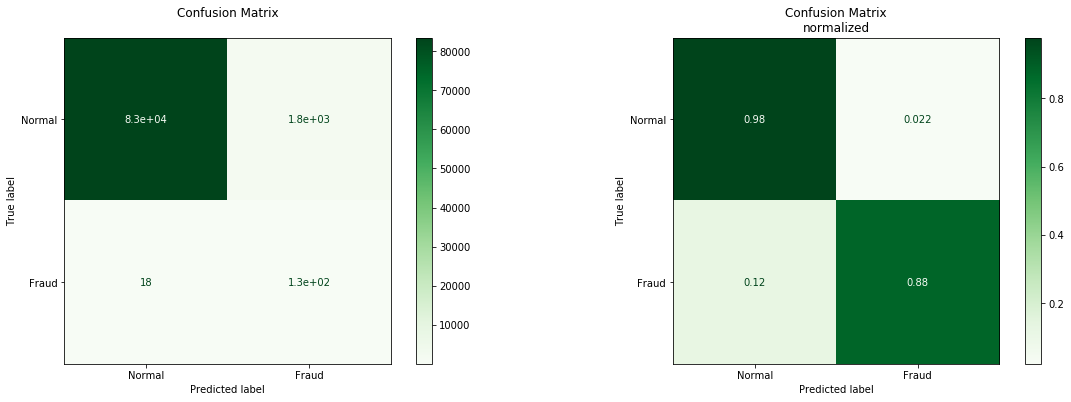

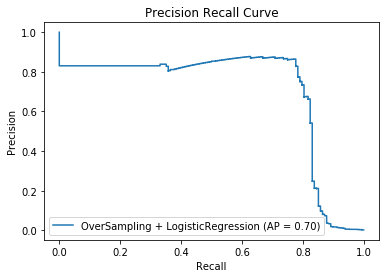

In [37]:
evaluate_model(clf_3, X_test, y_test, 'OverSampling + LogisticRegression')

## Undersampling + Logistic Regression

### K-Fold Cross Validation

In [38]:
rus = RandomUnderSampler(sampling_strategy='majority', random_state=seed)
log_reg = LogisticRegression(random_state=seed)

In [39]:
model = Pipeline([
        ('sampling', rus),
        ('classification', log_reg)
    ])

In [40]:
scoring = 'f1'
parameters = {
    'classification__C':[0.01, 0.1, 1, 10, 100],
    'classification__max_iter':[500]
}

In [41]:
GSCV_4 = GridSearchCV(model,
                      cv=K, param_grid=parameters, scoring=scoring, n_jobs=-1, verbose=2)
GSCV_4.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  25 | elapsed:   10.7s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   10.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('sampling',
                                        RandomUnderSampler(random_state=42,
                                                           ratio=None,
                                                           replacement=False,
                                                           return_indices=False,
                                                           sampling_strategy='majority')),
                                       ('classification',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                      

In [42]:
clf_4 = GSCV_4.best_estimator_
GSCV_4.best_score_

0.2563337853337678

### Evaluate on test set

Class distribution in test data:
Normal: 85295
Fraud: 148


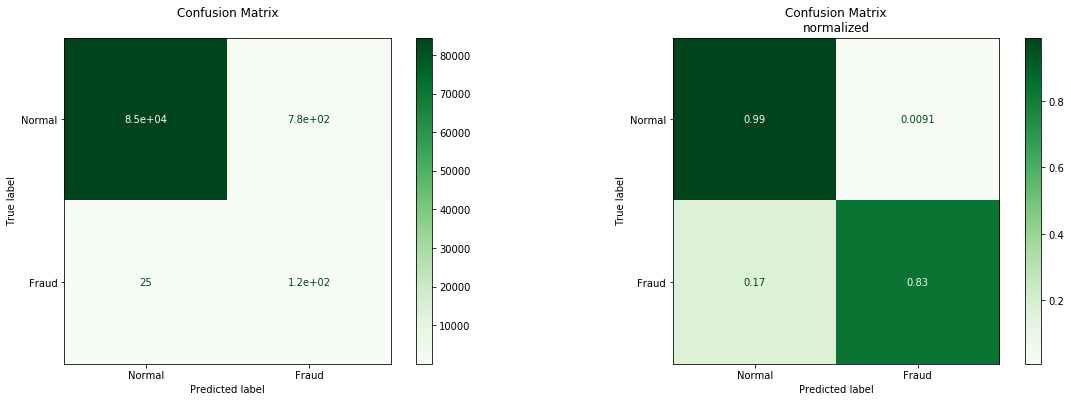

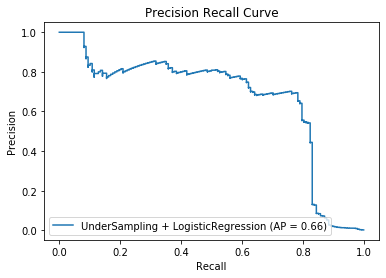

In [43]:
evaluate_model(clf_4, X_test, y_test, 'UnderSampling + LogisticRegression')

## Summary

### Model 1

Class distribution in test data:
Normal: 85295
Fraud: 148


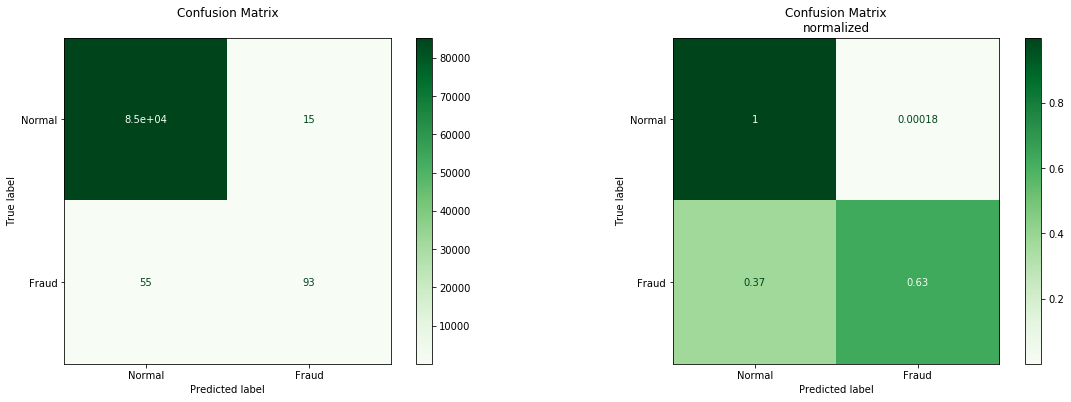

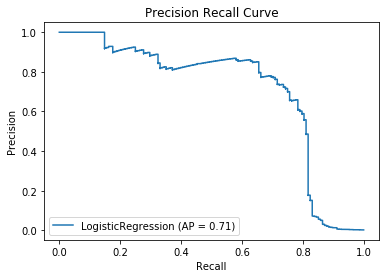

In [44]:
evaluate_model(clf_1, X_test, y_test, 'LogisticRegression')

### Model 2

Class distribution in test data:
Normal: 85295
Fraud: 148


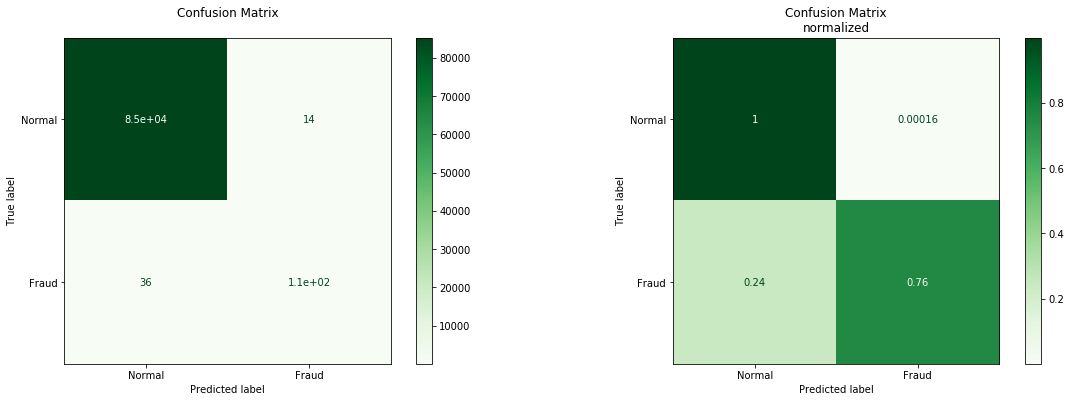

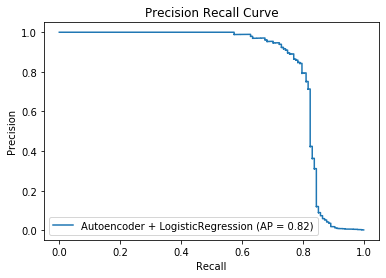

In [45]:
evaluate_model(clf_2, X_test_lat, y_test, 'Autoencoder + LogisticRegression')

### Model 3

Class distribution in test data:
Normal: 85295
Fraud: 148


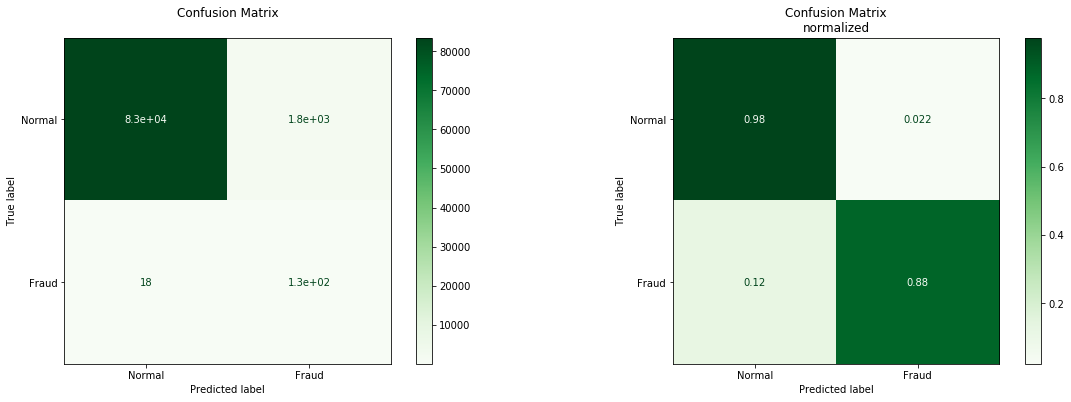

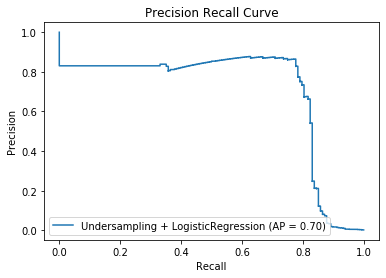

In [46]:
evaluate_model(clf_3, X_test, y_test, 'Undersampling + LogisticRegression')

### Model 4

Class distribution in test data:
Normal: 85295
Fraud: 148


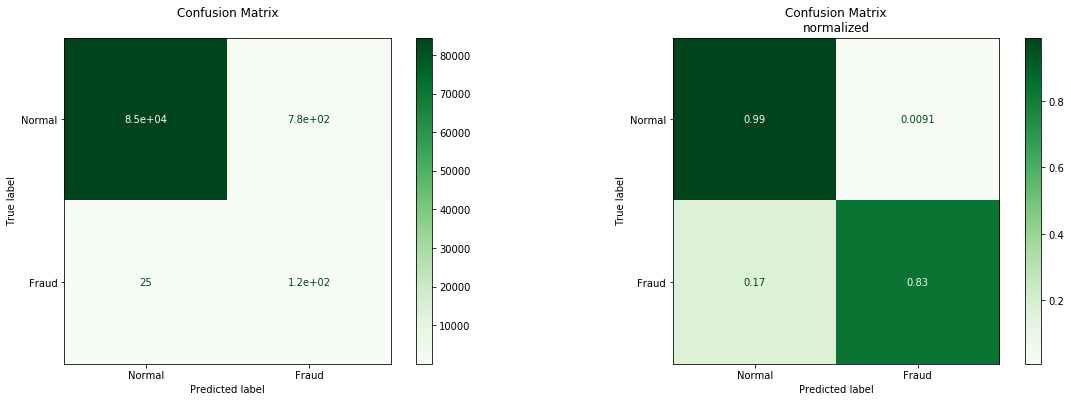

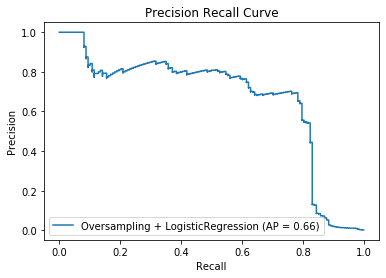

In [47]:
evaluate_model(clf_4, X_test, y_test, 'Oversampling + LogisticRegression')